In [180]:
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Задание №1

### Поместить данные iris_dataset в объект DataFrame библиотеки pandas.

In [181]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris['name'] = df_iris.target.apply(lambda x : iris.target_names[x])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Вычислить корреляции между признаками на всей таблице

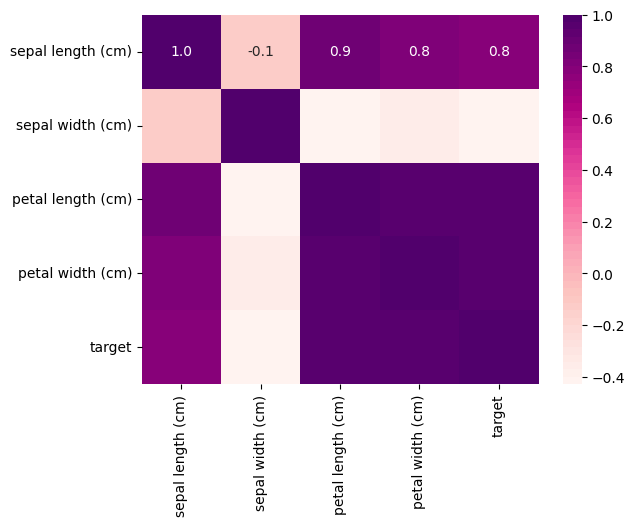

In [182]:
sns.heatmap(df_iris.drop('name', axis=1).corr(), annot = True, fmt=".1f", cmap= sns.color_palette("RdPu", 50))
plt.show()

### Вычислить корреляции между признаками отдельно по классам 

<Axes: ylabel='target-None'>

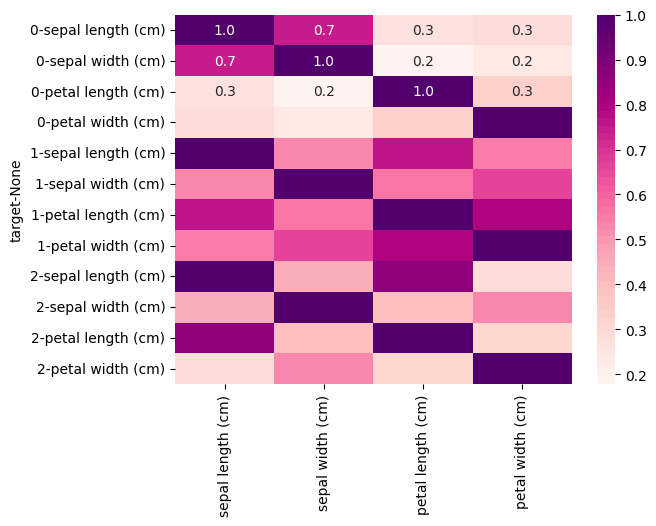

In [183]:
df_iris_for_classes = df_iris.drop('name', axis=1).groupby(['target'])
sns.heatmap(df_iris_for_classes.corr(), annot = True, fmt=".1f", cmap= sns.color_palette("RdPu", 50))

### Визуализировать распределения классов на всех парах переменных.

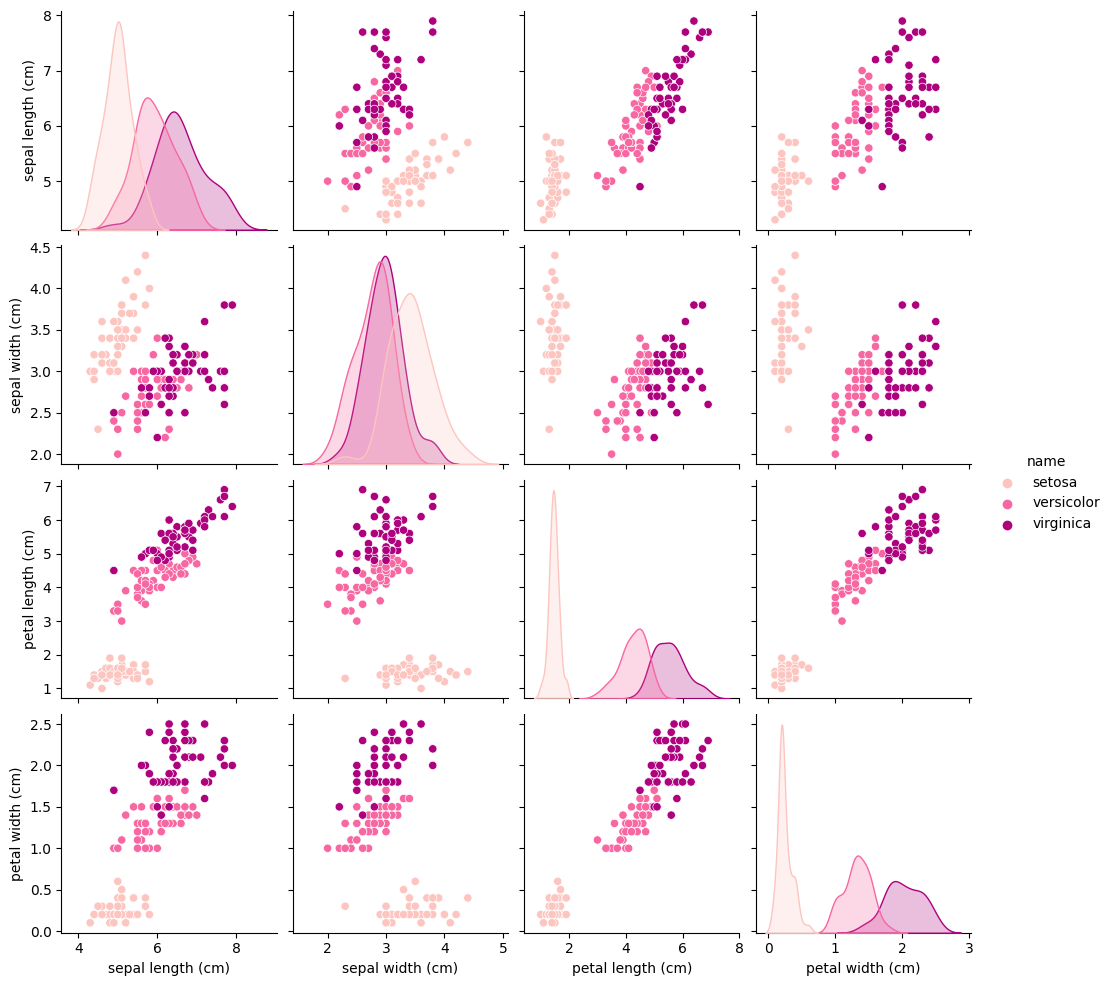

In [184]:
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']],palette= sns.color_palette("RdPu", 3),  hue = 'name')

# Задание №2

### Из предыдущего задания я наглядно определила два более различающие на классы признаки: petal length, petal width

In [185]:
PALT = sns.cubehelix_palette(as_cmap=True)
FEATURE_1 = 'petal length (cm)'
FEATURE_2 = 'petal width (cm)'

In [186]:
def data_to_plot(X, Y):
    """
    Вспомогательная функция для визуализации распределения данных по двум признакам.
    
    Параметры
    ---------
    X - наш исходный датасет состоящий из двух призанков.
    Y - значения класса (labels).
    """
    setosa = X[Y == 0]
    versicolor = X[Y == 1]
    virginica = X[Y == 2]

    fig, ax = plt.subplots()
    fig.set_size_inches(13, 7) 

    ax.scatter(setosa[FEATURE_1], setosa[FEATURE_2], label="Setosa Petal", facecolor="#fbb4b9")
    ax.scatter(versicolor[FEATURE_1], versicolor[FEATURE_2], label="Versicolor", facecolor="#f768a1")
    ax.scatter(virginica[FEATURE_1], virginica[FEATURE_2], label="Virginica", facecolor="#c51b8a")

    ax.set_xlabel(FEATURE_1)
    ax.set_ylabel(FEATURE_2)
    ax.grid()
    ax.set_title("Iris petals")
    ax.legend()

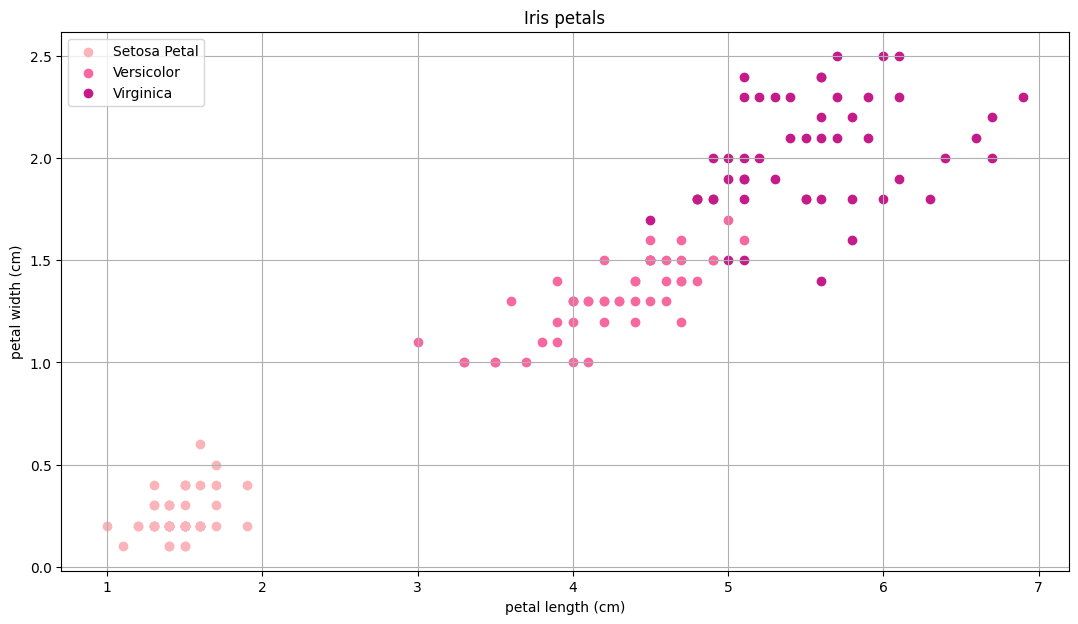

In [187]:
data_to_plot(df_iris, df_iris.target)

### Переопределяем наш датасет, оставляя нужные признаки

In [188]:
new_df_iris = df_iris[['petal length (cm)', 'petal width (cm)', 'target', 'name']]
new_df_iris

,petal length (cm),petal width (cm),target,name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


In [189]:
def visualization_model(model, X, feature_1, feature_2, Y):
    """
    Вспомогательная функция для визуализации работы обученной модели по двум признакам.
    
    Параметры
    ---------
    model - обученная модель
    X - наш исходный датасет состоящий из двух призанков.
    feature_1 - первый признак, на котором обучалась наша модель.
    feature_2 - второй признак, на котором обучалась наша модель.
    Y - значения класса (labels).
    """
    _, ax = plt.subplots(figsize=(13, 7))
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=PALT,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        xlabel=feature_1,
        ylabel=feature_2,
        eps=0.5,
    )

    plt.scatter(X[feature_1], X[feature_2], c=Y, edgecolors="k", cmap=PALT)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [190]:
X = new_df_iris.drop(['target', 'name'], axis=1)
Y = new_df_iris.target

### Линейный дискриминант

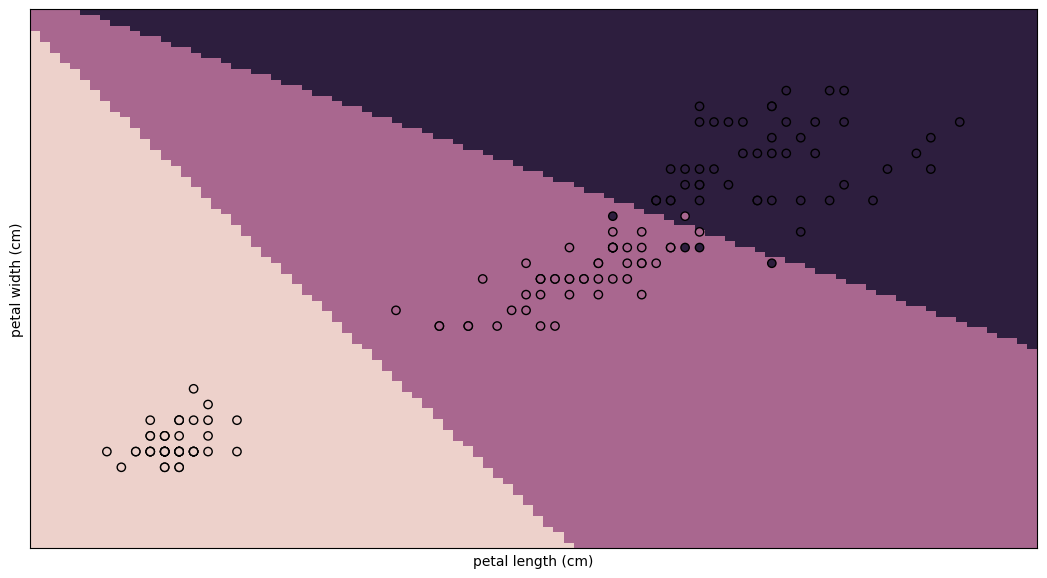

In [191]:
model = LinearDiscriminantAnalysis()
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)

### Квадратичный дискриминант

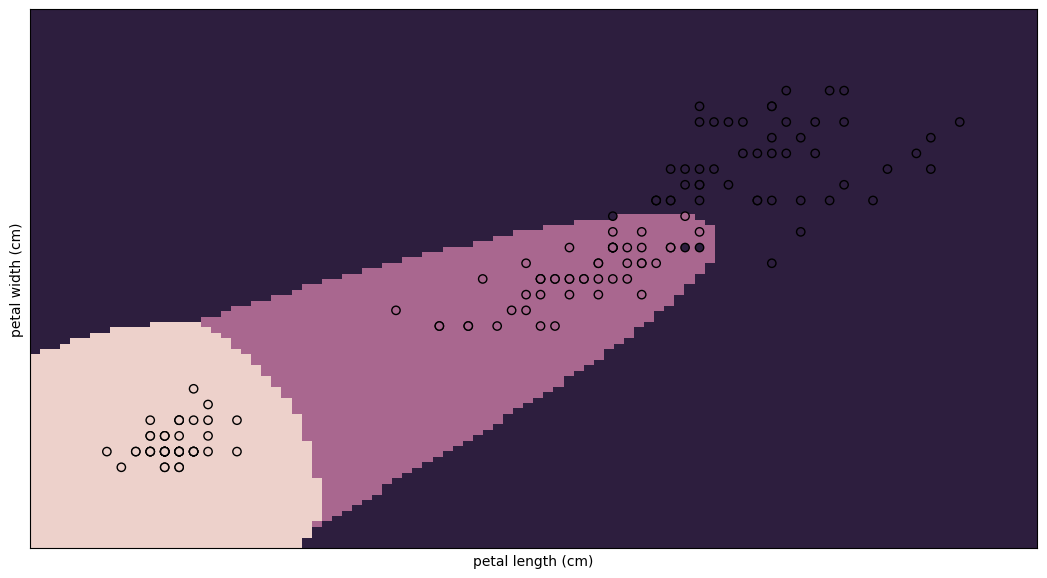

In [192]:
model = QuadraticDiscriminantAnalysis()
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)


###  Логистическая регрессия

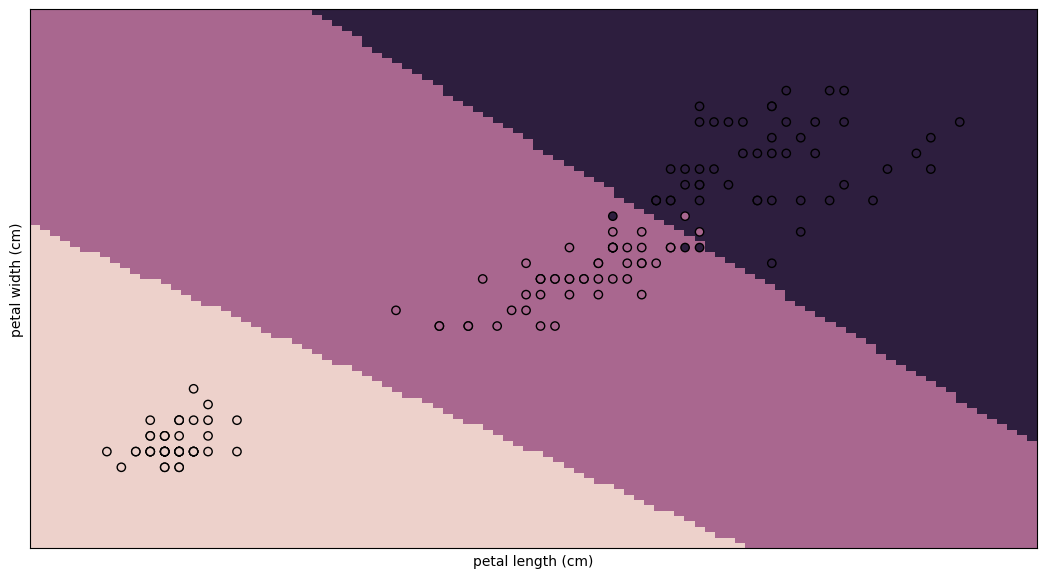

In [193]:
model = LogisticRegression(C=1e5)
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)



### SVM (линейное ядро)

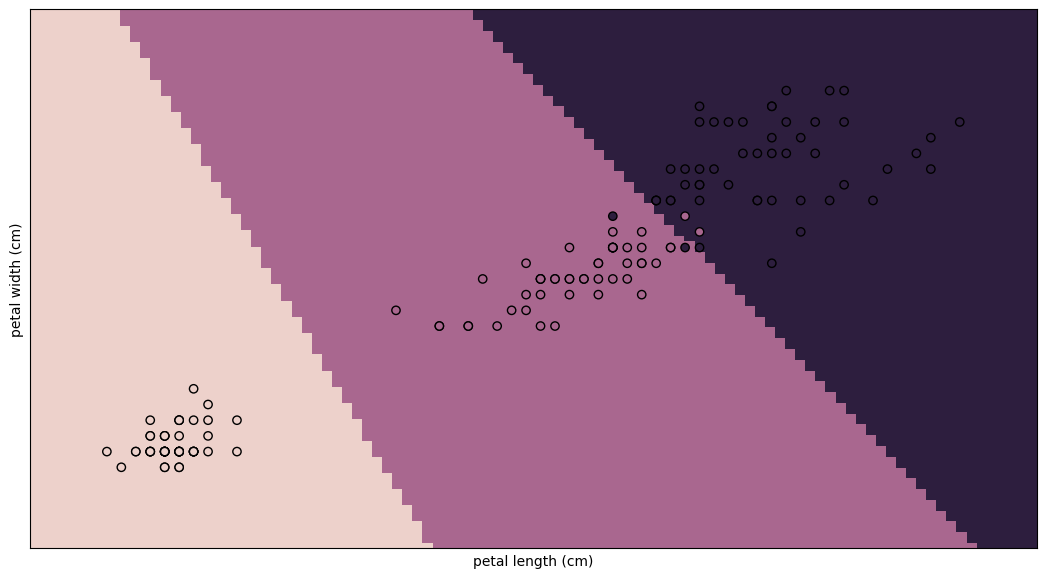

In [194]:
model = svm.SVC(kernel="linear", C=1.0)
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)

### SVM (квадратичное ядро)

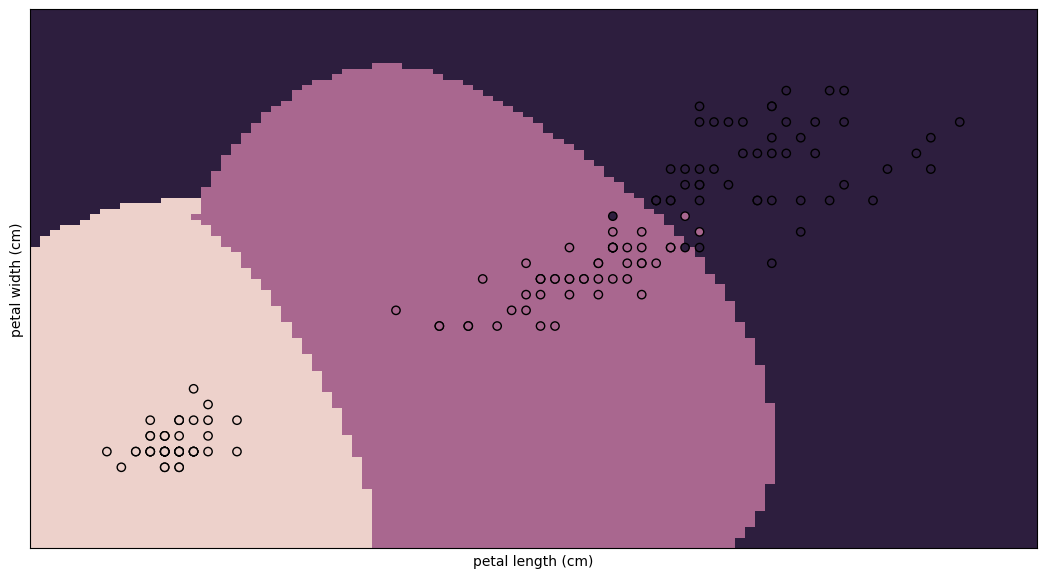

In [195]:
model = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)

# Задание №3

### Оставляем два класса

In [196]:
df_iris = df_iris.loc[df_iris['name'] != 'versicolor']

### Линейный дискриминант на всех переменных

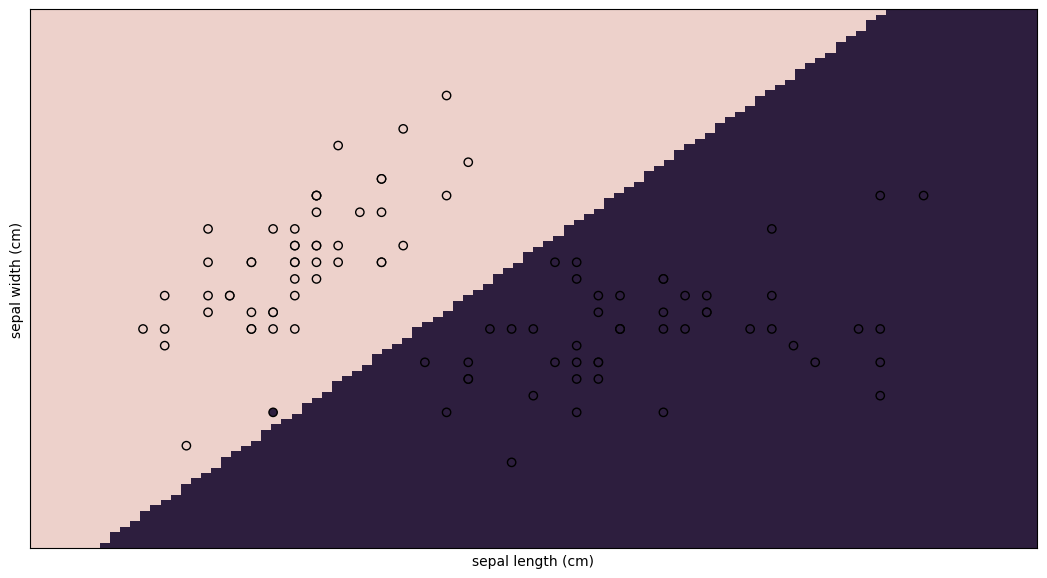

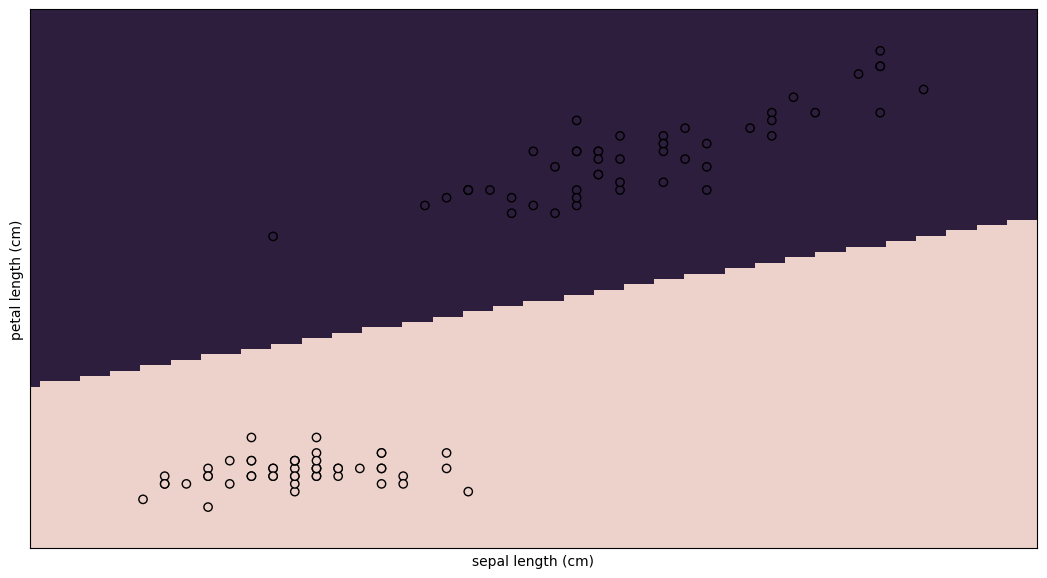

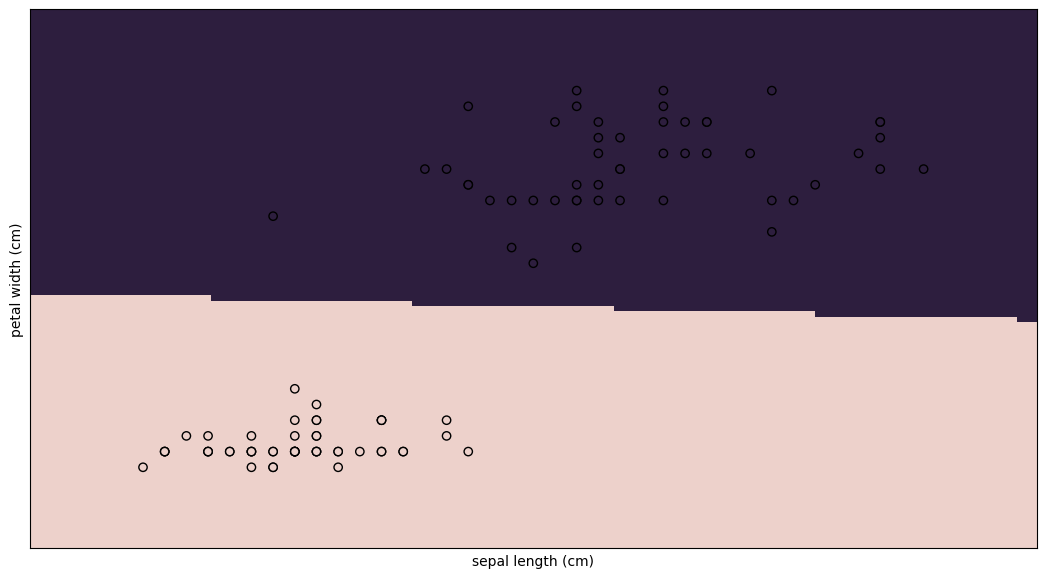

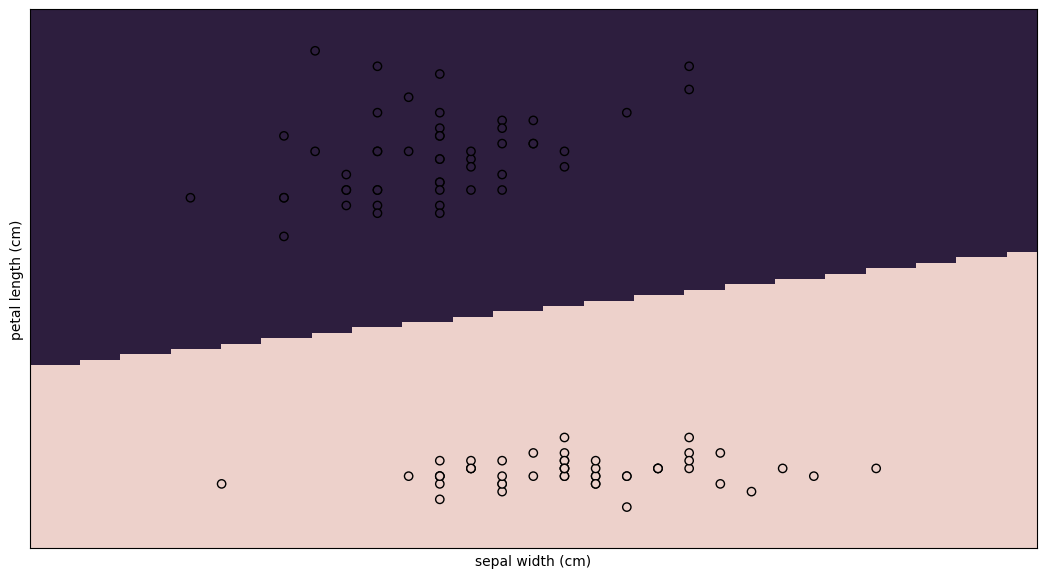

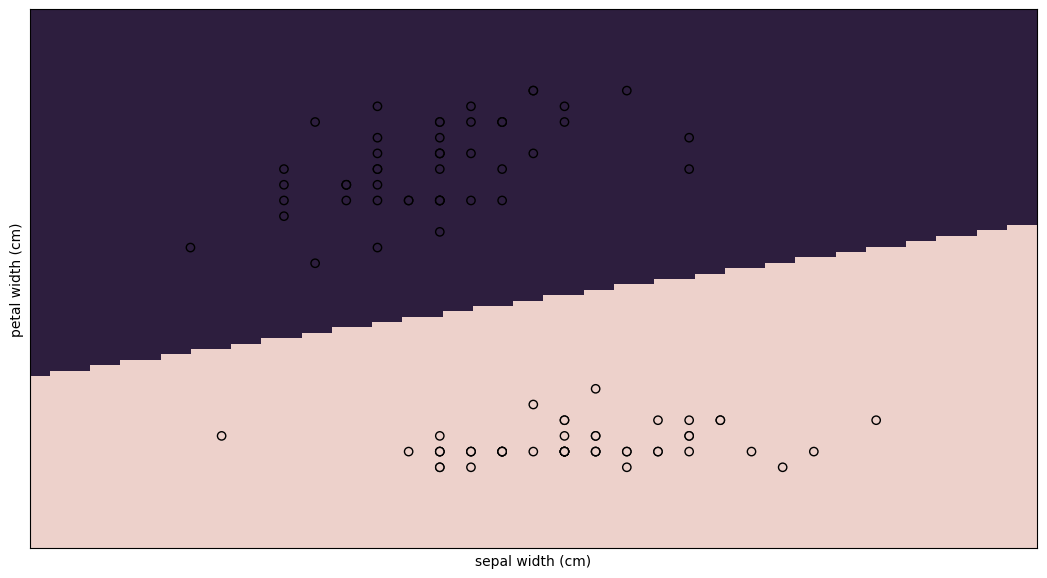

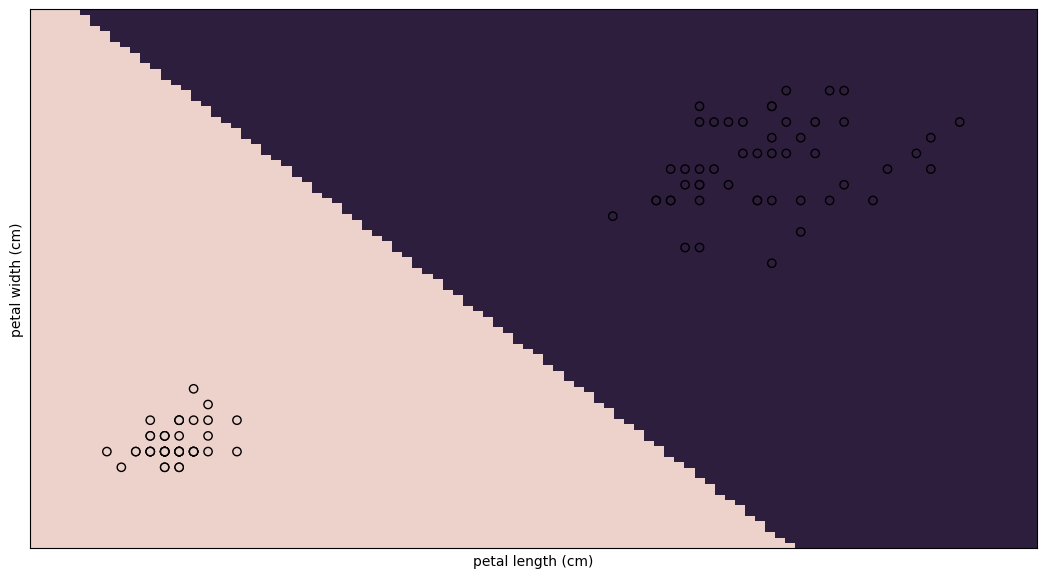

In [197]:
X = df_iris.drop(['target', 'name'], axis=1)
Y = df_iris.target
for f1, f2 in combinations(list(X), 2):

    model = LinearDiscriminantAnalysis()
    model.fit(X[[f1, f2]], Y)

    visualization_model(model, X[[f1, f2]], f1, f2, Y)

# Задние №4

### Вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних 

In [198]:
def mean_for_classes(x, y, classes):
    """
    Рассчет среднего значения для каждого класса по всем признакам

    Параметры
    ---------
    x - DataFrame всех признаков
    y - DataFrame значения класса (labels)
    classes - список всех классов

    Возвращает
    ----------
    Матрица размером (количесвто классов, количество признаков)
    """
    M = np.zeros((len(classes), len(list(x))))
    for c in classes:
        M[c] = np.array(x[y == c].mean())
    return M

def covv_for_classes(x, y, classes):
    """
    Рассчет ковариации по всем классам

    Параметры
    ---------
    x - DataFrame всех признаков
    y - DataFrame значения класса (labels)
    classes - список всех классов

    Возвращает
    ----------
    Матрица размером (количесвто классов, количество признаков, количество признаков)
    """    
    C = np.zeros((len(classes), x.shape[1], x.shape[1]))
    for c in classes:
        C[c] = np.array(x[y == c].cov())
    return C

def covv_for_classes_r(matrix):
    """
    Рассчет обратной матрицы ковариации по всем классам

    Параметры
    ---------
    matrix - мартрица ковариации по всем классам размером(количесвто классов, количество признаков, количество признаков)

    Возвращает
    ----------
    Матрица размером (количесвто классов, количество признаков, количество признаков)
    """  
    for i in range(matrix.shape[0]):
        matrix[i] = np.linalg.inv(matrix[i])
    return matrix

def log_det_of_matrix(matrix):
    """
    Рассчет значения десятичного логарифма для определителя обратных матриц ковариации по всем классам

    Параметры
    ---------
    matrix - обратная мартрица ковариации по всем классам размером(количесвто классов, количество признаков, количество признаков)

    Возвращает
    ----------
    Массив значений логарифма размером (количество классов)
    """  
    result = np.zeros((matrix.shape[0]))
    for i in range(matrix.shape[0]):
        result[i] = np.log10(np.linalg.det(matrix[i]))
    return result

def QDA(X, Y):
    """
    Метод квадратичного дискриминанта

    Параметры
    ---------
    X - DataFrame всех признаков
    Y - DataFrame значения класса (labels)

    Возвращает
    ----------
    Массив значений принадлежности к классу размером (количество экземпляров во всем DataFrame)
    """  
    CLASSES = np.unique(Y)
    MEAN = mean_for_classes(X, Y, CLASSES)
    COV = covv_for_classes(X, Y, CLASSES)
    COV_I = covv_for_classes_r(COV)
    LOG = log_det_of_matrix(COV_I)
    f = np.zeros((X.shape[0], len(CLASSES)))
    result = np.zeros((X.shape[0]))
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            f[i][j] = np.dot((np.array(X.iloc[[i]]) - MEAN[j]), np.dot(COV_I[j], np.transpose(np.array(X.iloc[[i]]) - MEAN[j]))) + LOG[j]
        result[i] = np.argmin(f[i])
    return result

X = new_df_iris.drop(['target', 'name'], axis=1)
Y = new_df_iris.target
arr = QDA(X, Y)
Y = pd.DataFrame({'target':Y, 'result': arr.astype(int,copy=False)})
Y

,target,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


### Визуальное сравнение результатов своего алгоритма и встроенной модели

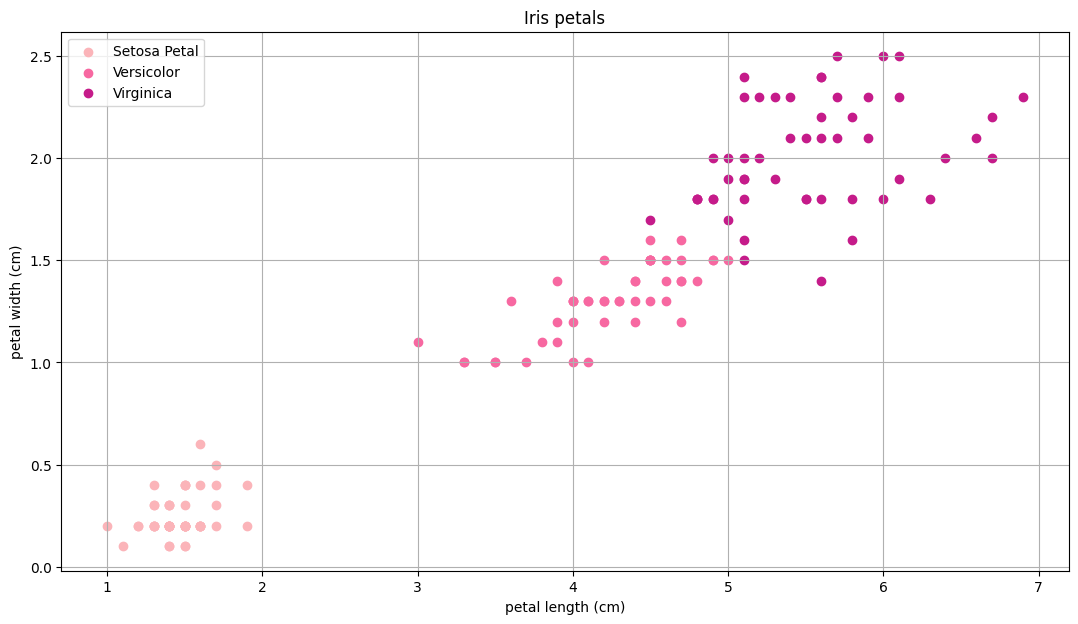

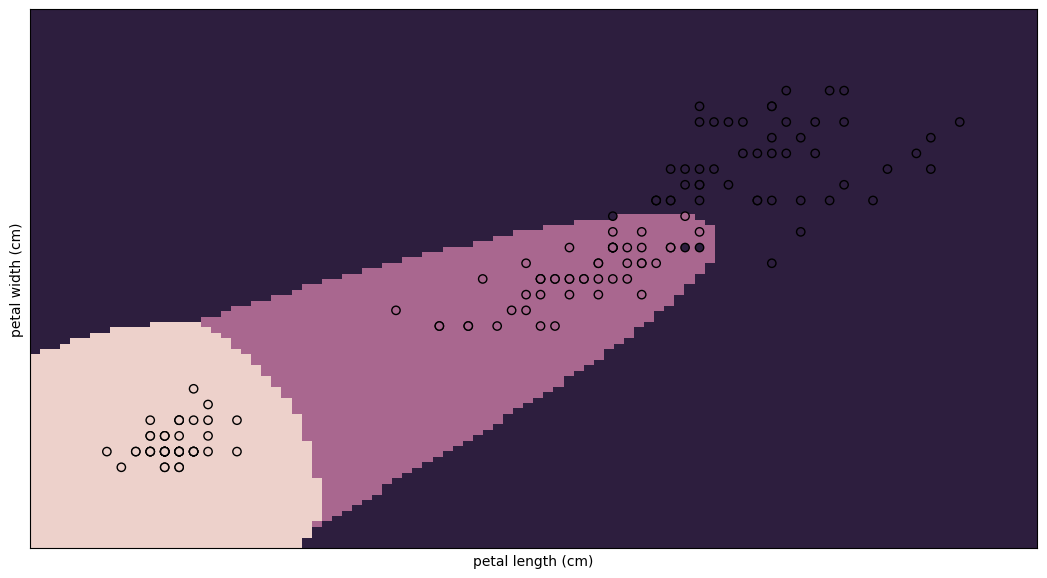

In [199]:
df = X.join(Y)
data_to_plot(X, Y.result)

X = new_df_iris.drop(['target', 'name'], axis=1)
Y = new_df_iris.target
model = QuadraticDiscriminantAnalysis()
model.fit(X, Y)

visualization_model(model, X, FEATURE_1, FEATURE_2, Y)